<a href="https://colab.research.google.com/github/gdimop10/CS230-final-project/blob/main/CS_230_project_v11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import torch
import tensorflow
import sys
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image

In [2]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt 

     |████████████████████████████████| 596 kB 7.7 MB/s 


# Generating the Baseline of YOLO Model

In [3]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12153, done.
remote: Total 12153 (delta 0), reused 0 (delta 0), pack-reused 12153
Receiving objects: 100% (12153/12153), 11.95 MiB | 18.37 MiB/s, done.
Resolving deltas: 100% (8418/8418), done.


In [4]:
# Load YOLO Model
yolo_model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-31 Python-3.7.13 torch-1.11.0+cu113 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 719x1280 12 persons
Speed: 201.0ms pre-process, 465.1ms inference, 14.5ms NMS per image at shape (1, 3, 384, 640)

---------------------
Coordinates of boundary boxes:
           xmin        ymin         xmax        ymax  confidence  class  \
0    460.993286  530.748108   501.483948  644.126282    0.839245      0   
1    805.509216  519.685669   870.293274  613.353271    0.828579      0   
2    746.476135  523.740540   792.880676  610.516541    0.824544      0   
3   1117.773682  486.036835  1154.656250  585.428406    0.815784      0   
4    932.291138  486.112274   974.866943  593.370789    0.748508      0   
5   1004.956665  502.694275  1042.874512  593.882751    0.737029      0   
6    907.616150  512.955383   944.877869  606.081360    0.732169      0   
7    567.064209  251.340576   600.530640  311.935364    0.645539      0   
8   1258.034790  303.757812  1279.568237  438.778198    0.635354      0   
9   1150.339478  361.971313  1222.269653  454.437927    0.623179      0

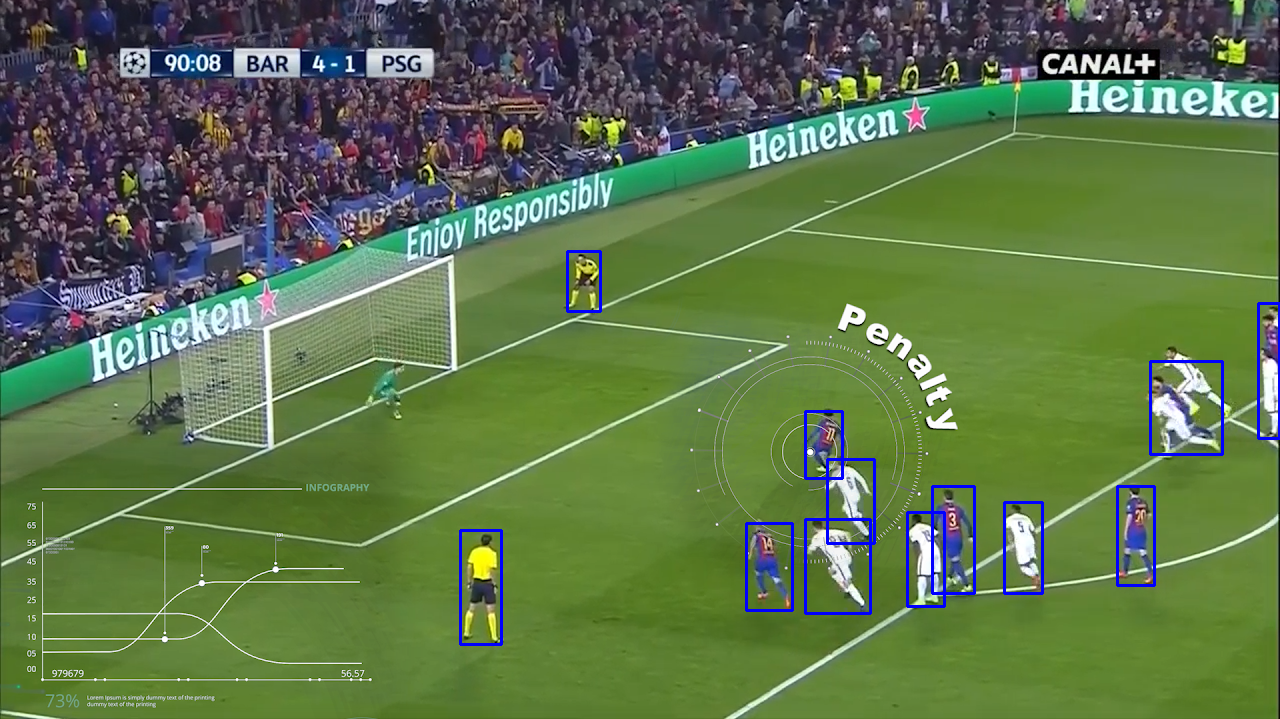

In [5]:
import cv2
from matplotlib.pyplot import imshow
from google.colab.patches import cv2_imshow
import numpy as np
# Test image saved locally. This image is displayed in the Project Milestone report.
img = Image.open('./soccernet3.png')
# Inputs the image into the pretrained YOLO model, and outputs its results.
yolo_model.eval()
results = yolo_model(img)
a = results.pandas().xyxy[0]
print(results)
print('---------------------')
print("Coordinates of boundary boxes:")
print(a)
# Draws boundary boxes around the detected objects.
base = cv2.imread('./soccernet3.png')
height = base.shape[0]
width = base.shape[1]
for x in range(len(a)):
  cv2.line(base, (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymin'])), (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymax'])), (255,0,0), 2)
  cv2.line(base, (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymax'])), (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymax'])), (255,0,0), 2)
  cv2.line(base, (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymax'])), (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymin'])), (255,0,0), 2)
  cv2.line(base, (int(a.iloc[x]['xmax']),int(a.iloc[x]['ymin'])), (int(a.iloc[x]['xmin']),int(a.iloc[x]['ymin'])), (255,0,0), 2)

cv2_imshow(base)

# Downloading the SoccerNet dataset
(courtesy of https://www.soccer-net.org/tasks/tracking; in particular, the https://github.com/SoccerNet/sn-tracking repo)


In [ ]:
!pip install SoccerNet
from SoccerNet.Downloader import SoccerNetDownloader
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="path/to/SoccerNet")
mySoccerNetDownloader.downloadDataTask(task="tracking", split=["train","test","challenge"])

# Reordering the SoccerNet dataset
This code takes the images out of their respective SMOT/img1 folders and places them all into a single folder.

In [ ]:
!unzip path/to/SoccerNet/tracking/train.zip

In [ ]:
!unzip path/to/SoccerNet/tracking/test.zip

In [10]:
import os
# creates a train folder to place all the training images into
newpath = '/content/dataset'
if not os.path.exists(newpath):
  os.makedirs(newpath)

newpath2 = '/content/dataset/images'
if not os.path.exists(newpath2):
  os.makedirs(newpath2)

newpath3 = '/content/dataset/images/train'
if not os.path.exists(newpath3):
  os.makedirs(newpath3)

newpath4 = '/content/dataset/images/test'
if not os.path.exists(newpath4):
  os.makedirs(newpath4)

newpath5 = '/content/dataset/labels/train'
if not os.path.exists(newpath5):
  os.makedirs(newpath5)

newpath6 = '/content/dataset/labels/test'
if not os.path.exists(newpath6):
  os.makedirs(newpath6)

In [11]:
import os
print(os.getcwd())
os.chdir("/content/train")
print(os.getcwd())

/content
/content/train


In [12]:
################################         TEST CODE 6         ##############################################
###########################################################################################################
# extracts the images from the train/img1 files into /content/trainimages2
import os, sys, random, shutil
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile
import pandas as pd
from sklearn import preprocessing, model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches
import numpy as np

from PIL import Image, ImageDraw
from sklearn.model_selection import train_test_split


name_counter = 1
gtlist = []
# loops over the smnot files
smotfiles = sorted(os.listdir())
#for file in sorted(os.listdir()):
for num in range(1):
  ###################################################################
  file = smotfiles[21]
  ###################################################################
  if ('SNMOT' in file):
    # opens and reads gameinfo file
    gameinfo_path = '/content/train/' + file + '/gameinfo.ini' 
    with open(gameinfo_path) as gameinfo:
      gameinfolines = gameinfo.readlines()
    # opens and reads gt file
    gt_path = '/content/train/' + file + '/gt/gt.txt'
    with open(gt_path) as gt:
      gtlines = gt.readlines()
    # tokenizes each line in gt to create a list with the info needed for YOLO
    for line in gtlines:
      line = line.split(",")
      gtlist.append(line[:6])
    # converts the coordinates into the proper YOLO format
    for i in range(len(gtlist)):
      gtlist[i][0] = int(gtlist[i][0])
      # converts the trackletID into its specific class, which is readable by YOLO
      id_substring = "trackletID_" + str(gtlist[i][1])
      for giline in gameinfolines:
        if id_substring in giline:
          if "player team left" in giline:
            gtlist[i][1] = 0
          elif "player team right" in giline:
            gtlist[i][1] = 1
          elif "goalkeeper team left" in giline:
            gtlist[i][1] = 2
          elif "goalkeeper team right" in giline:
            gtlist[i][1] = 3
          elif "referee;main" in giline:
            gtlist[i][1] = 4
          elif "referee;side top" in giline:
            gtlist[i][1] = 5
          elif "referee;side bottom" in giline:
            gtlist[i][1] = 5
          elif "staff" in giline:
            gtlist[i][1] = 6
          elif "ball" in giline:
            gtlist[i][1] = 7
      gtlist[i][2] = (float(gtlist[i][2]) + (float(gtlist[i][4]) / 2)) / 1920
      gtlist[i][3] = (float(gtlist[i][3]) + (float(gtlist[i][5]) / 2)) / 1080
      gtlist[i][4] = float(gtlist[i][4]) / 1920
      gtlist[i][5] = float(gtlist[i][5]) / 1080
    # now that the gt list is converted to YOLO format, combine with corresponding img
    for file2 in os.listdir(file):
      if (file2 == 'img1'):
        source = os.getcwd() + '/' + file + '/' + file2 + '/'
        images = sorted(os.listdir(source))
      # this for loop renames each image file to prevent duplicates and stores them in a list
        for i in range(len(images)):
          old_img_name = images[i]
          new_img_name = str(name_counter) + old_img_name
          os.rename(source + old_img_name, source + new_img_name)
          images[i] = new_img_name
      # this combines both lists into one final list for each photo.
        for i in range(len(images)):
          # sets up name of new txt file with path of /content/train/SNMOT-060/img1/*image*.txt
          txt_name = "/content/train/" + file + "/img1/" + images[i]
          txt_name = txt_name.replace("jpg", "txt")
          # creates a list of all objects within a photo
          total_image_list = []
          for j in range(len(gtlist)):
            image_list = []
            if (gtlist[j][0] == (i + 1)):
              image_list.append(gtlist[j][1])
              image_list.append(gtlist[j][2])
              image_list.append(gtlist[j][3])
              image_list.append(gtlist[j][4])
              image_list.append(gtlist[j][5])
              total_image_list.append(image_list)
          # creates .txt files which correspond to the .jpg images in img1
          corrected_image_list = []
          for item in total_image_list:
            corrected_image_list.append(item)
          first_item_list = corrected_image_list[:1]
          other_item_list = corrected_image_list[1:]
          with open(txt_name, 'w') as txt_file:
            first_line = ' '.join([str(first_item) for first_item in first_item_list[0]])
            txt_file.write(f"{first_line}")
            for m in range(len(other_item_list)):
              txt_file.write('\n')
              next_line = txt_line = ' '.join([str(other_item) for other_item in other_item_list[m]])
              txt_file.write(f"{next_line}")
    # creates train.txt file containing 90% of the .jpg images in img1
    ninety_percent = int(len(images) * .9)
    train_set = images[:ninety_percent]
    first_train_set = train_set[:1]
    other_train_set = train_set[1:]
    train_txt_name = "/content/train/" + file + "/img1/train.txt"
    with open(train_txt_name, 'w') as train_txt_file:
      first_train_line = str(first_train_set[0])
      train_txt_file.write(first_train_line)
      for n in range(len(other_train_set)):
        train_txt_file.write('\n')
        next_train_line = str(other_train_set[n])
        train_txt_file.write(next_train_line)
    # creates test.txt files containing 10% of the .jpg images in img1
    test_set = images[ninety_percent:]
    first_test_set = test_set[:1]
    other_test_set = test_set[1:]
    test_txt_name = "/content/train/" + file + "/img1/test.txt"
    with open(test_txt_name, 'w') as test_txt_file:
      first_test_line = str(first_test_set[0])
      test_txt_file.write(first_test_line)
      for n in range(len(other_test_set)):
        test_txt_file.write('\n')
        next_test_line = str(other_test_set[n])
        test_txt_file.write(next_test_line)

    # creates a copy of each file and places it into the proper folder
    big_source = '/content/train/' + file + '/img1/'
    big_list = sorted(os.listdir(big_source))
    for i in range(len(big_list)):
      name = str(big_list[i])
      if i < (ninety_percent * 2):
        if ('test' not in name) and ('train' not in name):
          if ('.jpg' in name):
            shutil.copy2(big_source + name, '/content/dataset/images/train')
          if ('.txt' in name):
            shutil.copy2(big_source + name, '/content/dataset/labels/train')
      else:
        if ('test' not in name) and ('train' not in name):
          if ('.jpg' in name):
            shutil.copy2(big_source + name, '/content/dataset/images/test')
          if ('.txt' in name):
            shutil.copy2(big_source + name, '/content/dataset/labels/test')
        



In [13]:
import json
import yaml
data = {
    'train': '/content/dataset/images/train/',
    'val' : '/content/dataset/images/test/',
    'nc' : 8,
    'names': ['player team left', 'player team right', 'goalkeeper team left', 'goalkeeper team right', 'main referee', 'side referee', 'staff', 'ball']
}
with open('/content/dataset/soccernet.yaml', 'w') as outfile:
  yaml.dump(data, outfile)

In [ ]:
!pip install wandb

In [ ]:
import wandb
import tensorflow as tf
wandb.init(project = "CS230_v7", entity = "gdimop")

!python /content/yolov5/train.py \
  --data /content/dataset/soccernet.yaml \
  --epochs 10 \
  --bbox_interval 1 \
  --batch 32 \
  --weights yolov5s.pt

wandb: Currently logged in as: gdimop. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/dataset5/soccernet.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 4 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-237-g50b886d Python-3.7.13 torch-1.11.0+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8